In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import StackingClassifier,StackingRegressor,RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import SVC, SVR
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.decomposition import PCA

from sklearn import impute
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection

from sklearn.metrics import accuracy_score,roc_curve,auc,precision_recall_curve,fbeta_score, make_scorer
from sklearn import model_selection, metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import xgboost as xgb
import lightgbm as lgb

from scipy import stats
from scipy.stats import spearmanr
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
x_train = pd.read_csv('./qrt/X_train.csv')
y_train = pd.read_csv('./qrt/y_train.csv')
x_test = pd.read_csv('./qrt/X_test.csv')

In [3]:
x_train

,ID,DAY_ID,COUNTRY,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
0,1054,206,FR,0.210099,-0.427458,-0.606523,0.606523,NaN,0.692860,NaN,...,-0.444661,-0.172680,-0.556356,-0.790823,-0.283160,-1.069070,-0.063404,0.339041,0.124552,-0.002445
1,2049,501,FR,-0.022399,-1.003452,-0.022063,0.022063,-0.573520,-1.130838,0.573520,...,-1.183194,-1.240300,-0.770457,1.522331,0.828412,0.437419,1.831241,-0.659091,0.047114,-0.490365
2,1924,687,FR,1.395035,1.978665,1.021305,-1.021305,-0.622021,-1.682587,0.622021,...,1.947273,-0.480700,-0.313338,0.431134,0.487608,0.684884,0.114836,0.535974,0.743338,0.204952
3,297,720,DE,-0.983324,-0.849198,-0.839586,0.839586,-0.270870,0.563230,0.270870,...,-0.976974,-1.114838,-0.507570,-0.499409,-0.236249,0.350938,-0.417514,0.911652,-0.296168,1.073948
4,1101,818,FR,0.143807,-0.617038,-0.924990,0.924990,NaN,0.990324,NaN,...,-0.526267,-0.541465,-0.424550,-1.088158,-1.011560,0.614338,0.729495,0.245109,1.526606,2.614378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,459,809,DE,1.529204,1.106682,-1.855327,1.855327,-0.218658,1.450426,0.218658,...,0.509514,NaN,NaN,NaN,NaN,NaN,NaN,0.876984,0.819520,1.320373
1490,1674,887,FR,1.618582,1.752840,0.611392,-0.611392,0.449153,-0.152146,-0.449153,...,1.666252,NaN,NaN,NaN,NaN,NaN,NaN,0.932633,-0.085690,0.356356
1491,748,1083,DE,0.856399,0.489199,-0.255778,0.255778,-1.531544,-0.829568,1.531544,...,0.358120,0.207905,0.404763,-0.594595,0.894011,0.256338,0.402316,-1.112899,-0.237835,0.067152
1492,1454,1133,FR,0.560689,-0.343777,-0.830239,0.830239,-0.304856,1.210230,0.304856,...,-0.184862,-0.682815,-0.390304,-0.972088,-1.501930,1.215528,1.338708,0.962812,-5.392852,-0.843812


In [7]:
x_train.describe()

,ID,DAY_ID,DE_CONSUMPTION,FR_CONSUMPTION,DE_FR_EXCHANGE,FR_DE_EXCHANGE,DE_NET_EXPORT,FR_NET_EXPORT,DE_NET_IMPORT,FR_NET_IMPORT,...,FR_RESIDUAL_LOAD,DE_RAIN,FR_RAIN,DE_WIND,FR_WIND,DE_TEMP,FR_TEMP,GAS_RET,COAL_RET,CARBON_RET
count,1494.000000,1494.000000,1494.000000,1494.000000,1469.000000,1469.000000,1370.000000,1424.000000,1370.000000,1424.000000,...,1494.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1494.000000,1494.000000,1494.000000
mean,1072.759036,591.861446,0.427442,-0.020032,-0.145508,0.145508,-0.256332,-0.072643,0.256332,0.072643,...,-0.153688,-0.037831,0.019357,0.109480,0.123099,0.009451,0.008404,0.058126,0.061724,0.080510
std,618.013179,345.065043,0.673412,0.918995,0.970226,0.970226,0.957443,1.075830,0.957443,1.075830,...,0.896325,0.984233,1.051781,1.056243,1.054692,0.972394,1.003356,1.097768,1.033853,1.098624
min,0.000000,0.000000,-2.265563,-1.462350,-2.856874,-2.634831,-2.464849,-2.825331,-2.279619,-1.951516,...,-1.678936,-2.128531,-1.726420,-1.880419,-1.895319,-4.549638,-5.787097,-5.349463,-5.706442,-4.281790
25%,540.250000,292.250000,-0.037421,-0.716771,-0.875213,-0.638867,-0.977214,-0.851500,-0.452252,-0.794843,...,-0.802333,-0.642117,-0.503927,-0.652135,-0.672614,-0.618259,-0.647948,-0.624238,-0.458038,-0.522968
50%,1077.500000,591.000000,0.357061,-0.394166,-0.164287,0.164287,-0.306899,0.099455,0.306899,-0.099455,...,-0.460160,-0.274901,-0.228147,-0.261571,-0.229031,-0.026306,-0.020889,0.008493,0.063312,0.054056
75%,1597.500000,885.750000,0.922057,0.650533,0.638867,0.875213,0.452252,0.794843,0.977214,0.851500,...,0.382191,0.335237,0.154351,0.635050,0.824781,0.651832,0.699131,0.676415,0.641446,0.599094
max,2146.000000,1215.000000,2.033851,3.300640,2.634831,2.856874,2.279619,1.951516,2.464849,2.825331,...,2.918326,7.756118,9.473201,5.085624,4.965028,2.858758,2.817239,5.674778,3.746576,5.471818


In [4]:
x_train.duplicated().sum()

0

In [5]:
types = x_train.dtypes
uniques = x_train.apply(lambda x: x.unique().shape[0])
counts = x_train.count()
nulls = x_train.apply(lambda x: x.isnull().sum())
skewness = x_train.skew()
kurtosis = x_train.kurtosis()

columns = ['types','uniques','counts','nulls','skewness','kurtosis']
pd_cat = pd.concat([types, uniques, counts,nulls, skewness, kurtosis],axis=1)
pd_cat.columns = columns

In [6]:
pd_cat

,types,uniques,counts,nulls,skewness,kurtosis
ID,int64,1494,1494,0,-0.000535,-1.184017
DAY_ID,int64,851,1494,0,0.049485,-1.152366
COUNTRY,object,2,1494,0,NaN,NaN
DE_CONSUMPTION,float64,850,1494,0,-0.083401,0.125078
FR_CONSUMPTION,float64,851,1494,0,0.889733,-0.219706
DE_FR_EXCHANGE,float64,826,1469,25,0.008184,-0.637648
FR_DE_EXCHANGE,float64,826,1469,25,-0.008184,-0.637648
DE_NET_EXPORT,float64,728,1370,124,0.144758,-0.666527
FR_NET_EXPORT,float64,781,1424,70,-0.444129,-0.756951
DE_NET_IMPORT,float64,728,1370,124,-0.144758,-0.666527


In [7]:
# Null replace
x_train = x_train.fillna(x_train.mean())

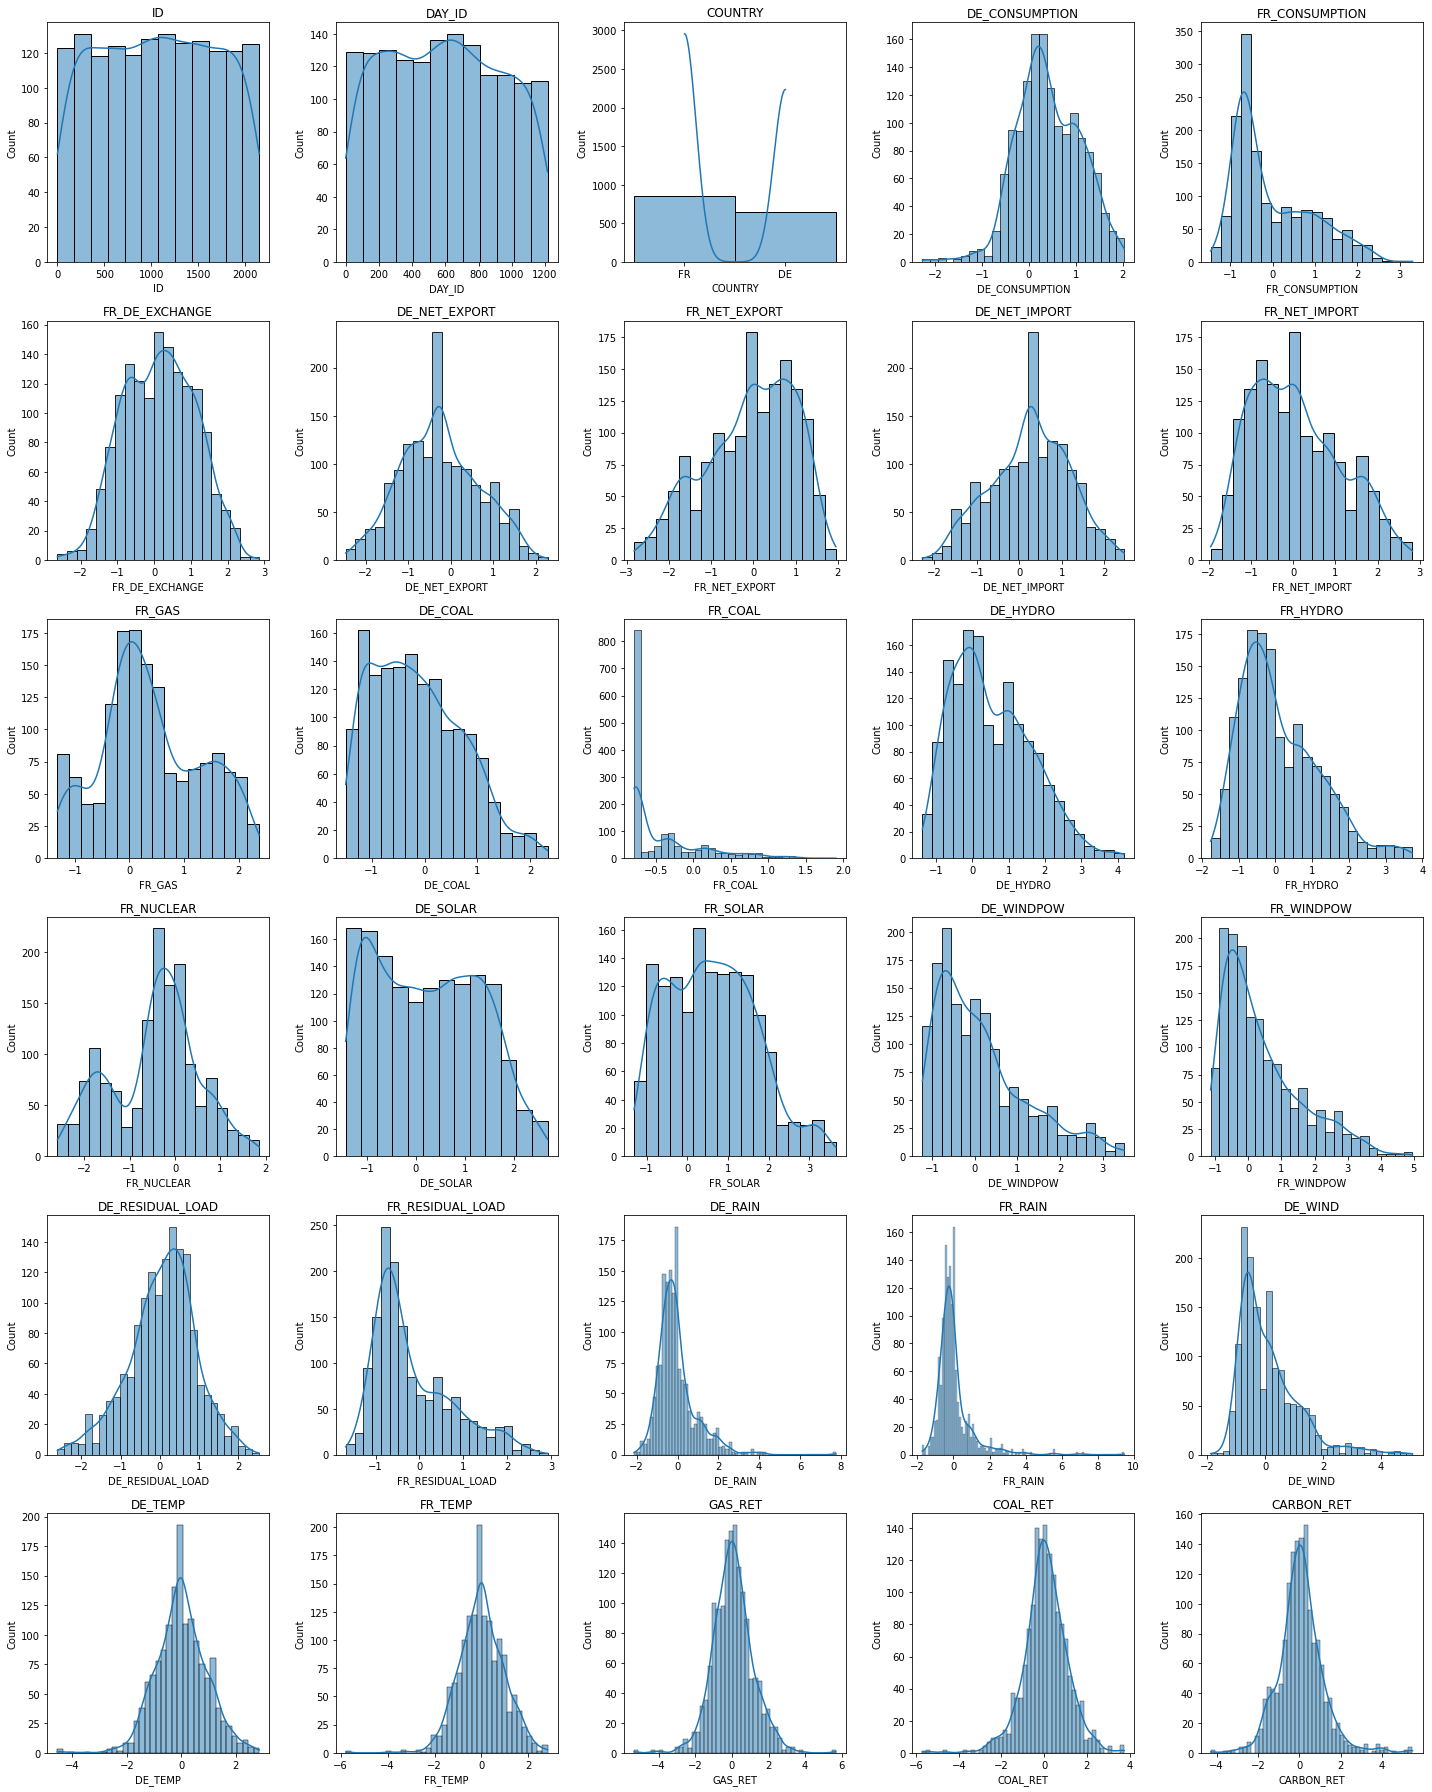

In [91]:
figure, axes = plt.subplots(6,5, figsize=(20,25))
for i in range(6):
    for j in range(5):
        sns.histplot(x_train.iloc[:, i*6+j],kde=True,ax=axes[i,j])
        axes[i,j].set_title(x_train.columns[i*6+j])
figure.tight_layout()

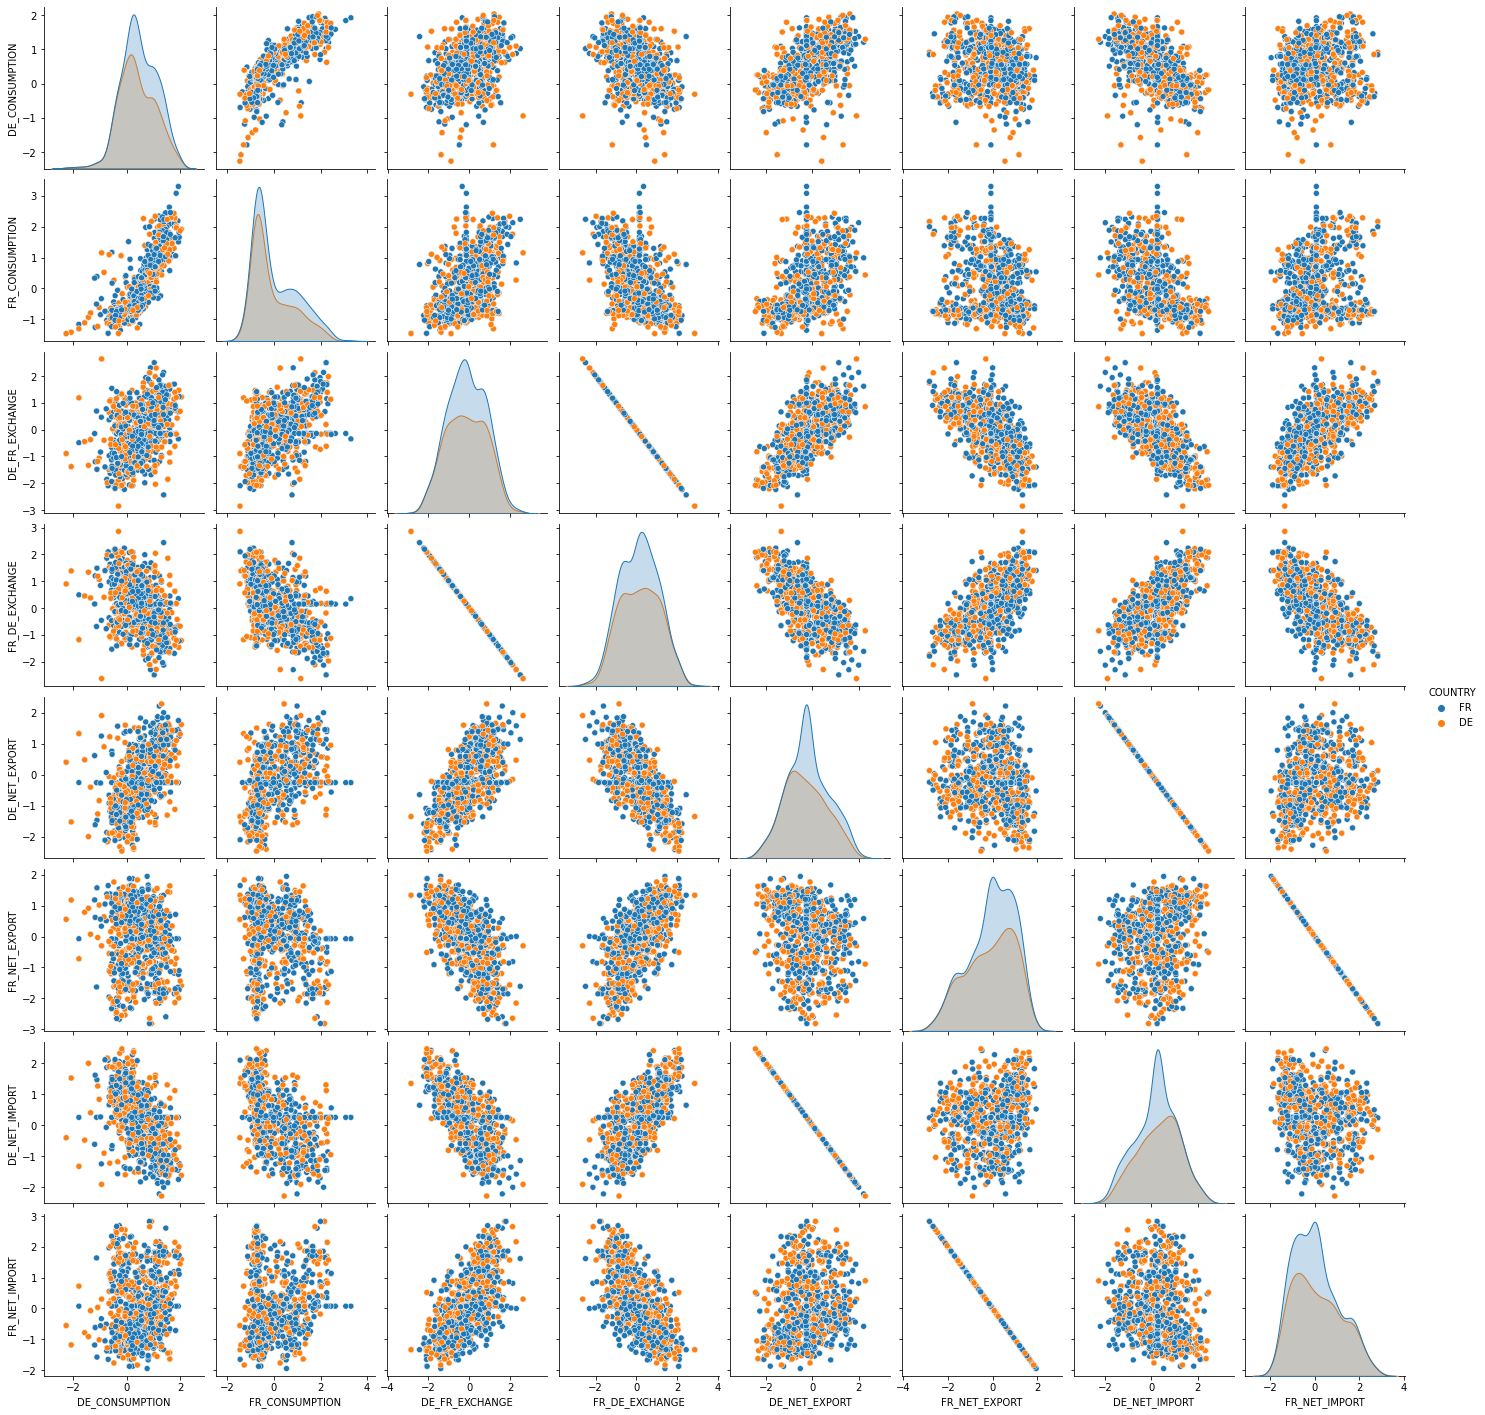

In [51]:
sns.pairplot(x_train[['COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT']], hue='COUNTRY')

In [50]:
x_train.columns

Index(['ID', 'DAY_ID', 'COUNTRY', 'DE_CONSUMPTION', 'FR_CONSUMPTION',
       'DE_FR_EXCHANGE', 'FR_DE_EXCHANGE', 'DE_NET_EXPORT', 'FR_NET_EXPORT',
       'DE_NET_IMPORT', 'FR_NET_IMPORT', 'DE_GAS', 'FR_GAS', 'DE_COAL',
       'FR_COAL', 'DE_HYDRO', 'FR_HYDRO', 'DE_NUCLEAR', 'FR_NUCLEAR',
       'DE_SOLAR', 'FR_SOLAR', 'DE_WINDPOW', 'FR_WINDPOW', 'DE_LIGNITE',
       'DE_RESIDUAL_LOAD', 'FR_RESIDUAL_LOAD', 'DE_RAIN', 'FR_RAIN', 'DE_WIND',
       'FR_WIND', 'DE_TEMP', 'FR_TEMP', 'GAS_RET', 'COAL_RET', 'CARBON_RET'],
      dtype='object')

<AxesSubplot:>

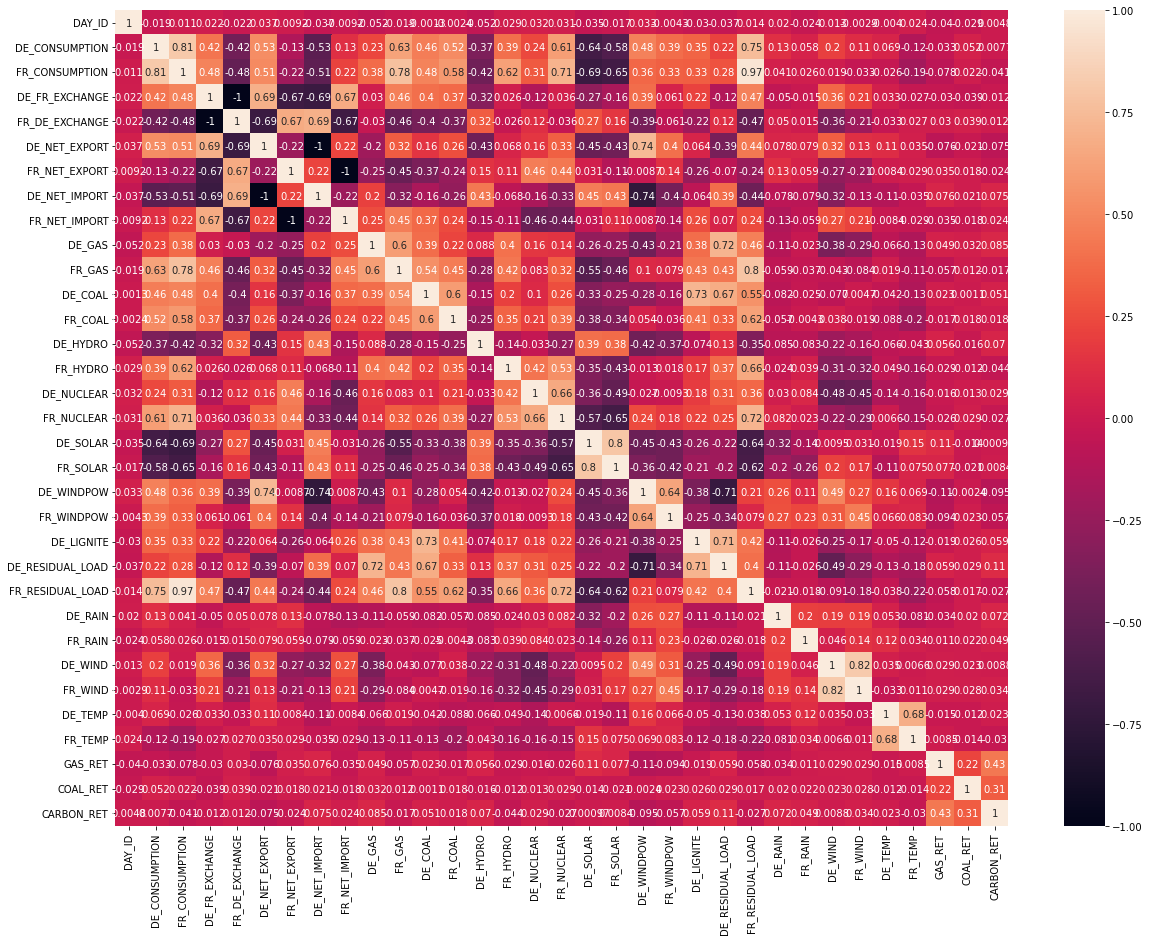

In [11]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(x_train.drop(['ID'], axis=1).corr(),annot=True, ax=ax)

E:\Anaconda3\envs\py36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


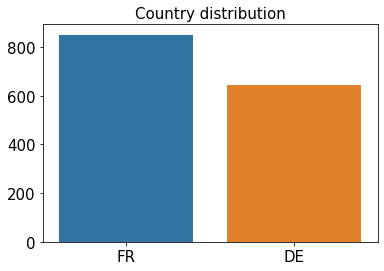

In [76]:
figure, ax = plt.subplots()
sns.barplot(x_train['COUNTRY'].value_counts().index, x_train['COUNTRY'].value_counts().values, ax=ax)
ax.set_title('Country distribution',fontsize=15)
ax.tick_params(axis='both',  labelsize=15)

<AxesSubplot:>

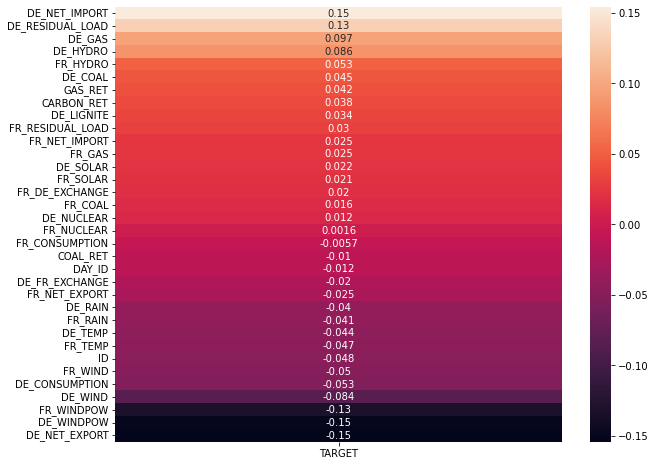

In [66]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(x_train.merge(y_train, on='ID').corr()['TARGET'].sort_values(ascending=False)).drop('TARGET'),annot=True)

### Feature Selection

In [28]:
# VIF
variance_inflation_factor(x_train.drop(['ID','DAY_ID','COUNTRY'],axis=1).values, )

1.1456074549483108

In [59]:
# PCA
pca = PCA(n_components=20)
pca.fit_transform(data.drop('COUNTRY',axis=1)).shape

(1494, 20)

## Modelling

In [32]:
data = x_train.merge(y_train, on='ID')

In [33]:
data['COUNTRY'] = pd.DataFrame(data['COUNTRY']).apply(LabelEncoder().fit_transform)

In [34]:
data = data.drop(['ID','DAY_ID'],axis=1)

In [35]:
train, valid = train_test_split(data, train_size = 0.8, test_size = 0.2)
data_train, target_train, data_valid, target_valid = train.drop('TARGET',axis=1), train['TARGET'],valid.drop('TARGET',axis=1), valid['TARGET']

### Random Forest

In [42]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(data_train,target_train) 

RandomForestRegressor()

In [43]:
rf_pred = rf.predict(data_valid)

In [44]:
spearmanr(rf_pred, target_valid).correlation

0.1807180737489713

In [94]:
#check feature importance
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': data_train.columns, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

             Feature  Importance
0            COUNTRY    0.091617
32        CARBON_RET    0.048335
20        FR_WINDPOW    0.042602
19        DE_WINDPOW    0.040549
10            FR_GAS    0.040537
30           GAS_RET    0.040309
22  DE_RESIDUAL_LOAD    0.038094
26           DE_WIND    0.034155
13          DE_HYDRO    0.034079
17          DE_SOLAR    0.033614
18          FR_SOLAR    0.032261
24           DE_RAIN    0.031933
21        DE_LIGNITE    0.031120
15        DE_NUCLEAR    0.030757
27           FR_WIND    0.030222
1     DE_CONSUMPTION    0.029322
7      DE_NET_IMPORT    0.029070
31          COAL_RET    0.027613
9             DE_GAS    0.026967
28           DE_TEMP    0.025945
25           FR_RAIN    0.023798
14          FR_HYDRO    0.023447
5      DE_NET_EXPORT    0.022794
12           FR_COAL    0.022612
11           DE_COAL    0.021000
16        FR_NUCLEAR    0.020893
23  FR_RESIDUAL_LOAD    0.020723
2     FR_CONSUMPTION    0.019865
3     DE_FR_EXCHANGE    0.018872
4     FR_D

### Grid Search

In [30]:
rf = RandomForestRegressor()
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3,  5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
grid_rf = GridSearchCV(rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [31]:
grid_rf.fit(data_train,target_train)

NameError: name 'data_train' is not defined

In [125]:
rf_pred = grid_rf.best_estimator_.predict(data_valid)

In [126]:
spearmanr(rf_pred, target_valid).correlation

0.6870485510987409

In [128]:
grid_rf.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 200}

In [129]:
rf = RandomForestRegressor(max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200)
rf.fit(data_train,target_train) 

RandomForestRegressor(max_depth=80, max_features=2, min_samples_leaf=5,
                      min_samples_split=10, n_estimators=200)

In [130]:
rf_pred = rf.predict(data_valid)
spearmanr(rf_pred, target_valid).correlation

0.1312001975264304

## Stack Analysis

In [45]:
estimators = [
    ('LinearRegression', LinearRegression()),
    ('SVR', SVR()),
    ('RandomForestRegressor', RandomForestRegressor(random_state=42)),
    ('GradientBoostingRegressor', GradientBoostingRegressor(random_state=42)),
    ('XGBoost', xgb.XGBRegressor(random_state=42)),
    ('LightGBM', lgb.LGBMRegressor(random_state=42)),
]

In [46]:

# Define the stacking classifier
stacking_Regressor = StackingRegressor(
    estimators=estimators,
    cv=5
)

# Fit the stacking classifier
stacking_Regressor.fit(data_train, target_train)

StackingRegressor(cv=5,
                  estimators=[('LinearRegression', LinearRegression()),
                              ('SVR', SVR()),
                              ('RandomForestRegressor',
                               RandomForestRegressor(random_state=42)),
                              ('GradientBoostingRegressor',
                               GradientBoostingRegressor(random_state=42)),
                              ('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            ena...
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraint

In [47]:
# Make predictions
y_val_pred = stacking_Regressor.predict(data_valid)

# Calculate the accuracy
stacking_loss = spearmanr(y_val_pred, target_valid).correlation
print(f"Stacking loss: {stacking_loss:.4f}")

Stacking loss: 0.2562


## DNN

In [92]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
#If you want more accuracy Let's optimize the neural network
def create_deeper_nn_model(input_dim):
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_dim=input_dim),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        layers.Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

deeper_nn_model = create_deeper_nn_model(X_train_scaled.shape[1])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

deeper_nn_history = deeper_nn_model.fit(
    X_train_scaled, y_train, validation_data=(X_val_scaled, y_val),
    epochs=200, batch_size=16, verbose=0,
    callbacks=[early_stopping, reduce_lr]
)

deeper_nn_accuracy = deeper_nn_history.history['val_accuracy'][-1]
print(f"Deeper Neural Network accuracy: {deeper_nn_accuracy:.4f}")